# Power laws in genetic engineering.
1. Number of plasmids per lab
2. Number of plasmids per country
3. Number of collaborations/ plasmid
4. Number of collaborations/ lab
5. Collab network degree distribution

In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import sys
import networkx as nx

sys.path.append('../')
from common.plot_style_utils import set_pub_plot_context, save_for_pub
%matplotlib inline

In [2]:
full = pickle.load(open("../../data/full/addgene_full.pickle", 'rb'))

In [3]:
full

,lab_id,plasmid,lab,category,sequence,lineage,ancestor_ids,alt_name,backbone_manufacturer,bacterial_resistance,...,growth_temp,growth_instructions,insert_size,modifications_to_backbone,mutation,selectable_markers,species,vector_backbone,vector_type,grna_shrna_sequence
addgene_id,,,,,,,,,,,,,,,,,,,,,
3,397,pSV-PGC1,Bruce Spiegelman,addgene-partial,NTTAGCCATGCGCGTACGTAACTTGGATCCTCTAGAGCGGCCGCCG...,NaN,NaN,PPAR gamma coactivator 1\PGC1,Invitrogen,Ampicillin,...,37,None,2400,None,None,None,M. musculus (mouse),pSV-Sport,Mammalian Expression,None
4,397,GFP-PGC1,Bruce Spiegelman,addgene-full,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,NaN,NaN,PGC1\PPAR gamma coactivator 1,Clontech,Kanamycin,...,37,None,2400,None,None,None,M. musculus (mouse),pEGFP-C1,Mammalian Expression,None
6,397,pCMX-PGC1,Bruce Spiegelman,addgene-partial,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,NaN,NaN,PGC1\PPAR gamma coactivator 1,None,Ampicillin,...,37,None,2400,None,None,None,M. musculus (mouse),pCMX,Mammalian Expression,None
41,397,pcDNA-p160MBP,Bruce Spiegelman,addgene-partial,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,NaN,NaN,Mybbp1a\p160MBP,Invitrogen,Ampicillin,...,37,None,4000,None,None,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None
42,397,pcDNA-p67MBP,Bruce Spiegelman,addgene-partial,ACCCATGGCGGAGATGAAACCCTACGAAAGCTGAGCCTGCGACTCC...,NaN,NaN,Mybbp1a\p67MBP,Invitrogen,Ampicillin,...,37,None,1740,None,None,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None
43,397,pcDNA-p160(1-200),Bruce Spiegelman,addgene-partial,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,NaN,NaN,Mybbp1a\p160MBP,Invitrogen,Ampicillin,...,37,None,600,None,None,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None
44,397,pcDNA-p160(200-400),Bruce Spiegelman,addgene-partial,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,NaN,NaN,Mybbp1a\p160MBP,Invitrogen,Ampicillin,...,37,None,600,None,Expresses only aa200-400,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None
45,397,pcDNA-p160(400-580),Bruce Spiegelman,addgene-partial,GCAGCTATGTGGCCTGGTTGCGGGACATGTTCCTGCAGCCTGACCT...,NaN,NaN,Mybbp1a\p160MBP,Invitrogen,Ampicillin,...,37,None,540,None,expresses only aa400-580,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None
46,397,pcDNA-p160C,Bruce Spiegelman,addgene-partial,GATGATGAGTACTCTGAAGGATTAGAGGCCCGCTCCTCTGAGACCA...,NaN,NaN,Mybbp1a\p160MBP,Invitrogen,Ampicillin,...,37,None,2260,None,expresses aa580-1330,None,M. musculus (mouse),pcDNA3.1 myc-His A,Mammalian Expression,None


In [4]:
lab_counts = full.lab.value_counts()

In [5]:
lab_counts

Michael Davidson        3251
David Root              2740
Jesse Boehm             1335
Keith Joung             1315
Cheryl Arrowsmith        861
Marc Vidal               858
Kiran Musunuru           839
William Hahn             814
Nicola Burgess-Brown     737
Sachdev Sidhu            714
Ron Weiss                685
Stephen Ekker            632
George Church            602
Bart Deplancke           586
David Sabatini           577
Susan Lindquist          539
Iain Cheeseman           517
David Bartel             466
David Liu                464
Gavin Wright             457
Brian Matthews           455
Daniel Voytas            437
Rob Parton               430
Dominic Esposito         427
Alexander Stark          422
Elizabeth Simpson        417
Youssef Belkhadir        400
Timothy Lu               398
Christopher Voigt        391
Feng Zhang               372
                        ... 
Kathleen_L Collins         1
Susanne von Bodman         1
Juan Burrone               1
Raymond Steven

In [6]:
set_pub_plot_context(context="paper")

[]

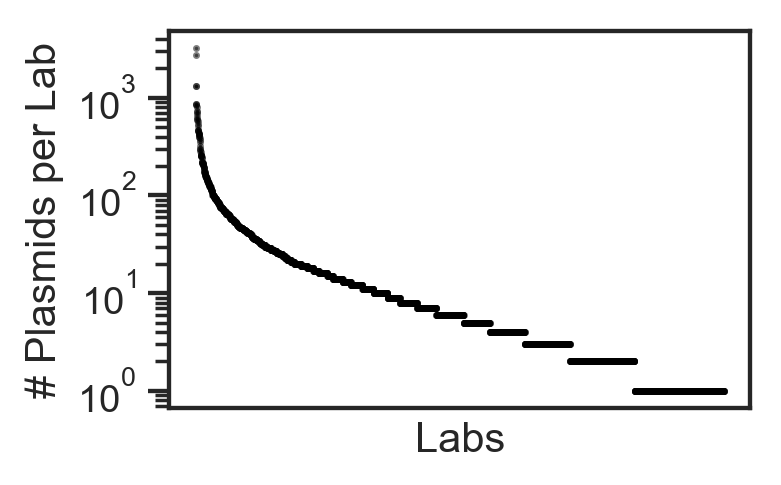

In [7]:
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Labs",
                    ylabel="# Plasmids per Lab")
palette = sns.color_palette()
ax.scatter(x=range(len(lab_counts)), y=lab_counts, s=1, color="black",alpha=.5) #linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
#ax.hist(x=range(len(lab_counts)), y=lab_counts, color=palette[0], edgecolor=[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])




mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


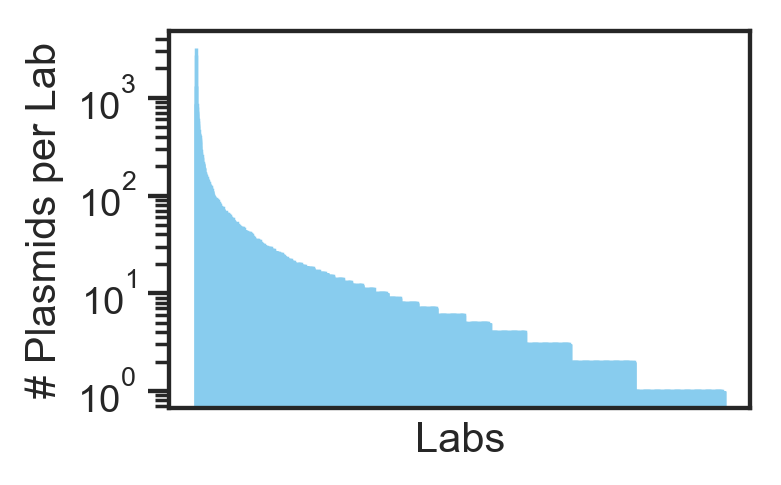

In [8]:
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Labs",
                    ylabel="# Plasmids per Lab")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(lab_counts)), height=lab_counts, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/lab_counts_v0", dpi=500)

In [9]:
countries_train = pickle.load(open( "../../data/tts/y_train_country.pkl", "rb" ))
country_counts = pd.Series(countries_train).value_counts()

In [10]:
encoder = pickle.load(
    open("../../data/encoders/country_to_index_ordinal_encoder.pkl", "rb")
)

display(country_counts)
display(encoder.inverse_transform(country_counts.index.values.reshape(-1,1)))

33.0    40143
32.0     2795
3.0      2730
10.0     2615
0.0      1465
30.0     1350
18.0     1107
19.0      686
1.0       662
5.0       576
9.0       522
28.0      443
24.0      384
29.0      294
8.0       289
7.0       258
26.0      216
16.0      211
22.0      112
17.0      104
13.0      100
2.0        68
21.0       44
12.0       37
20.0       35
25.0       32
6.0        28
27.0       26
23.0       26
31.0       25
11.0       22
15.0       19
14.0       11
4.0         9
dtype: int64

array([['United States'],
       ['United Kingdom'],
       ['Canada'],
       ['Germany'],
       ['Australia'],
       ['Switzerland'],
       ['Japan'],
       ['Netherlands'],
       ['Austria'],
       ['China'],
       ['France'],
       ['Spain'],
       ['Republic of Korea'],
       ['Sweden'],
       ['Finland'],
       ['Denmark'],
       ['Singapore'],
       ['Israel'],
       ['Poland'],
       ['Italy'],
       ['Hungary'],
       ['Belgium'],
       ['Norway'],
       ['Hong Kong'],
       ['New Zealand'],
       ['Russian Federation'],
       ['Czech Republic'],
       ['South Africa'],
       ['Portugal'],
       ['Taiwan'],
       ['Greece'],
       ['Ireland'],
       ['India'],
       ['Chile']], dtype=object)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


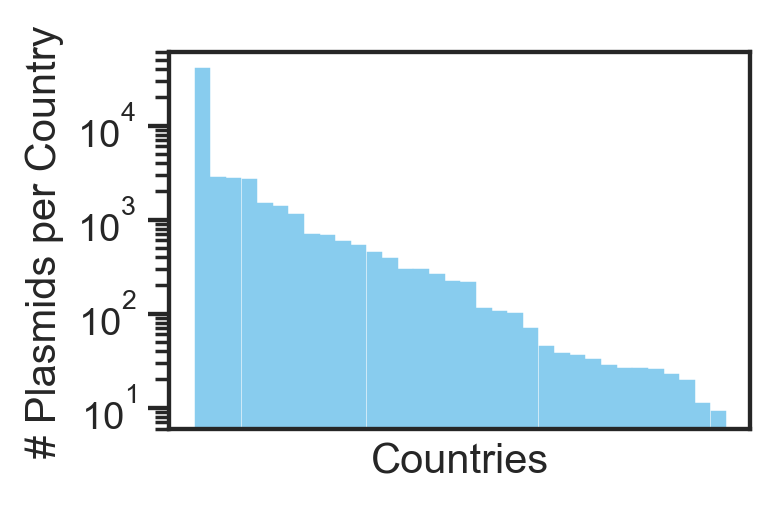

In [11]:
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Countries",
                    ylabel="# Plasmids per Country")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(country_counts)), height=country_counts, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/country_plasmid_counts_v0", dpi=500)

In [12]:
# Now the collaboration stuff
lineages = pickle.load(open("../../data/lineages/lineage2ids.pickle", "rb"))
ancestors = pickle.load(open("../../data/lineages/ancestors.pickle", "rb"))
descendents = pickle.load(open("../../data/lineages/descendents.pickle", "rb"))
display(ancestors)
display(descendents)

,ancestor_ids
addgene_id,
49,[16400]
50,[16400]
1191,[1280]
1345,[16440]
1351,[8856]
1352,[8856]
1355,[8855]
1356,[8855]
1357,[8851]


,descendent_id
ancestor_id,
1280.0,[1191]
1380.0,"[1381, 8923]"
1490.0,[61021]
1494.0,"[21824, 21825, 31240, 37464, 62599]"
1495.0,[37465]
1496.0,[37466]
1497.0,"[26814, 52032]"
1592.0,[74486]
1632.0,[38144]


In [13]:
from_link = []
to_link = []
for index in descendents.index.values:
    tos = descendents.loc[index,'descendent_id']
    to_link += tos
    from_link += [index] * len(tos)
    
graph = pd.DataFrame({
    "from":np.array(from_link,int), 
    "to": np.array(to_link,int)})
graph

,from,to
0,1280,1191
1,1380,1381
2,1380,8923
3,1490,61021
4,1494,21824
5,1494,21825
6,1494,31240
7,1494,37464
8,1494,62599
9,1495,37465


In [14]:
# Anytime a plasmid is mentioned in either the from or to column
# It represents one edge/ collaboration with that plasmid. 
collab_counts = pd.concat([graph['from'], graph['to']], axis=0).value_counts()

In [15]:
collab_counts

52963     2718
50005      757
26103      499
71409      429
19361      287
26096      262
31021      256
32288      250
32287      245
15300      243
26094      240
32285      223
24828      218
47051      200
47032      200
85814      180
26536      176
32290      172
1764       171
22423      165
14883      153
53976      142
53975      129
50004      125
48743      118
109732     113
26092      112
44182      111
29148      111
41392      104
          ... 
59592        1
61643        1
114893       1
75984        1
78035        1
26840        1
84188        1
16605        1
86239        1
47330        1
39142        1
69815        1
71862        1
78003        1
26776        1
55438        1
47260        1
75920        1
77971        1
65685        1
71830        1
84124        1
75952        1
20639        1
47266        1
77539        1
57513        1
114861       1
55470        1
75781        1
Length: 19947, dtype: int64

In [16]:
full.loc[collab_counts.index.values[:10],:]

,lab_id,plasmid,lab,category,sequence,lineage,ancestor_ids,alt_name,backbone_manufacturer,bacterial_resistance,...,growth_temp,growth_instructions,insert_size,modifications_to_backbone,mutation,selectable_markers,species,vector_backbone,vector_type,grna_shrna_sequence
addgene_id,,,,,,,,,,,,,,,,,,,,,
52963,969,lentiGuide-Puro,Feng Zhang,addgene-full,TAACAAATTGGCTGTGGTATATAAAATTATTCATAATGATAGTAGG...,868.0,NaN,S. pyogenes CRISPR customizable RNA element\pu...,None,Ampicillin,...,37,Use SapI digest to check for unwanted recombin...,100\600,None,None,Puromycin,Synthetic,Custom,"Mammalian Expression, Lentiviral, CRISPR",None
50005,1591,pUC19,Joachim Messing,depositor-full,GCGCCCAATACGCAAACCGCCTCTCCCCGCGCGTTGGCCGATTCAT...,13.0,[49793],None,Messing Lab,Ampicillin,...,37,None,None,None,None,None,None,"pUC6, Addgene plasmid #49793",cloning vector,None
26103,2558,pNIC28-Bsa4,Opher Gileadi,depositor-full,TAATACGACTCACTATAGGGGAATTGTGAGCGGATAACAATTCCCC...,337.0,NaN,None,Novagen,Kanamycin,...,37,None,None,None,None,None,None,pET28a,Bacterial Expression,None
71409,701,pLenti-sgRNA,David Sabatini,depositor-full,TTAATGTAGTCTTATGCAATACTCTTGTAGTCTTGCAACATGGTAA...,937.0,NaN,None,Feng Zhang,Ampicillin,...,30,None,None,removed Cas9 from Feng Zhang's pLentiCRISPR pl...,None,Puromycin,None,pLenti-CRISPR,Lentiviral,None
19361,1198,pcDNA5/FRT/TO,Harm Kampinga,depositor-full,GACGGATCGGGAGATCTCCCGATCCCCTATGGTGCACTCTCAGTAC...,80.0,NaN,None,Invitrogen,Ampicillin,...,37,None,None,None,None,Hygromycin,None,pcDNA5/FRT/TO,Mammalian Expression,None
26096,470,pET28-MHL,Cheryl Arrowsmith,depositor-full,TGGCGAATGGGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGT...,191.0,NaN,None,Structural Genomics Consortium,Kanamycin,...,37,None,None,None,None,None,None,pET28-MHL,Bacterial Expression,None
31021,622,pFUS_B4,Daniel Voytas,depositor-full,TTGATGCCTGGCAGTTCCCTACTCTCGCGTTAACGCTAGCATGGAT...,442.0,NaN,None,Invitrogen,Spectinomycin,...,37,DH10B/LB+antibiotics,459,None,None,None,None,pCR8,None,None
32288,1866,JDS74,Keith Joung,depositor-full,GACGGATCGGGAGATCTCCCGATCCCCTATGGTCGACTCTCAGTAC...,312.0,NaN,None,None,Ampicillin,...,37,None,None,None,None,None,None,JDS74,Mammalian Expression ; T7,None
32287,1866,JDS71,Keith Joung,depositor-full,GACGGATCGGGAGATCTCCCGATCCCCTATGGTCGACTCTCAGTAC...,274.0,NaN,None,None,Ampicillin,...,37,None,None,None,None,None,None,JDS71,Mammalian Expression ; T7,None


mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


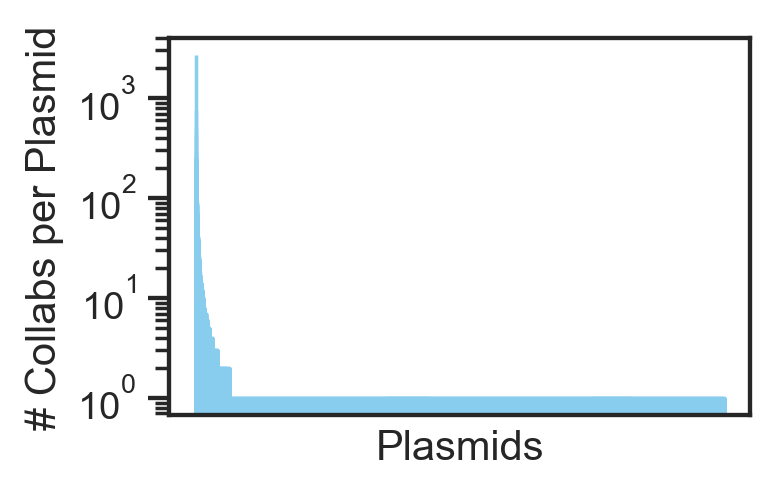

In [17]:
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Plasmids",
                    ylabel="# Collabs per Plasmid")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(collab_counts)), height=collab_counts, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/plasmid_collab_counts_v0", dpi=500)

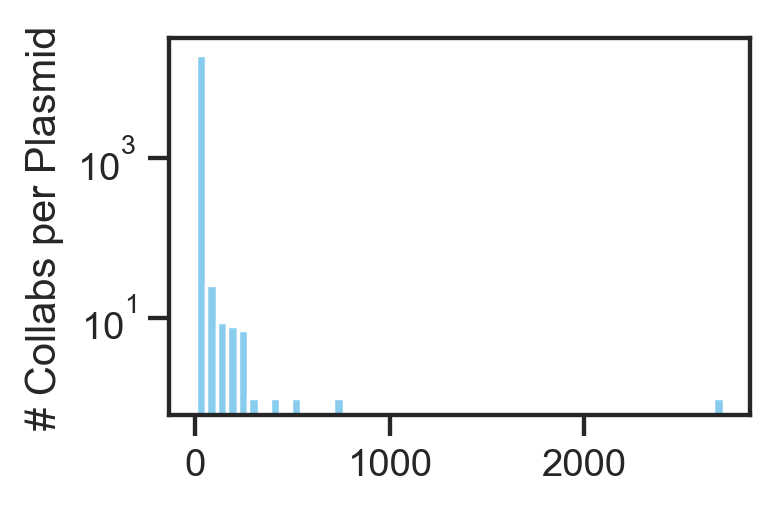

In [18]:
# And here we can cutoff the singleton counts
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="",
                    ylabel="# Collabs per Plasmid")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
#ax.bar(left=range(len(collab_counts)), height=collab_counts, color=palette[0], edgecolor=palette[0])
ax.hist(collab_counts,color=palette[0], bins=50)
ax.set_yscale("log", base=10)
#ax.set_xscale("log", base=10)
#ax.set_xticks([])

mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


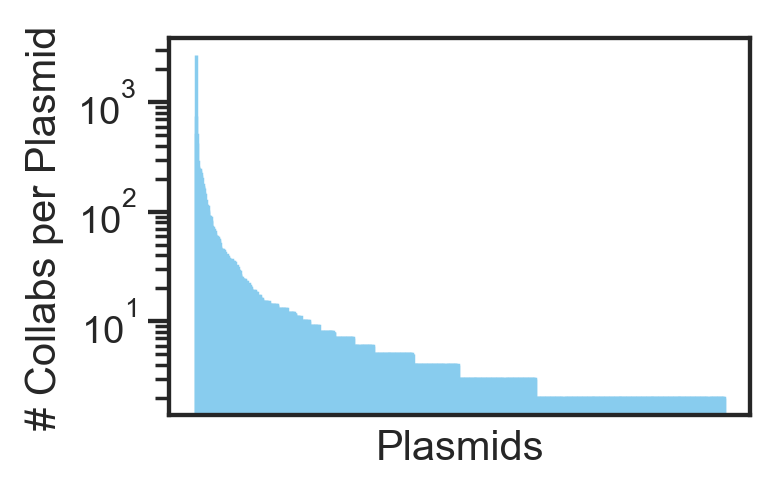

In [19]:
# Drop the singletons
mask = collab_counts > 1
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Plasmids",
                    ylabel="# Collabs per Plasmid")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(collab_counts[mask])), height=collab_counts[mask], color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/plasmid_collab_counts_NO_SINGLES_v0", dpi=500)

In [20]:
lab_graph_to = graph['to'].map(lambda x: full.loc[x,'lab'])
lab_graph_from = graph['from'].map(lambda x: full.loc[x,'lab'])
lab_graph = pd.DataFrame({
    'from':lab_graph_from,
    'to': lab_graph_to
})
lab_graph

,from,to
0,Susan Lindquist,Susan Lindquist
1,Pamela Silver,Pamela Silver
2,Pamela Silver,Pamela Silver
3,Andrew Fire,Casonya Johnson
4,Andrew Fire,David Ron
5,Andrew Fire,David Ron
6,Andrew Fire,Don Moerman
7,Andrew Fire,Hitoshi Sawa
8,Andrew Fire,David Tirrell
9,Andrew Fire,Hitoshi Sawa


In [21]:
# Need to drop redundant links from the lab graph.
lab_graph = lab_graph.drop_duplicates()
lab_graph

,from,to
0,Susan Lindquist,Susan Lindquist
1,Pamela Silver,Pamela Silver
3,Andrew Fire,Casonya Johnson
4,Andrew Fire,David Ron
6,Andrew Fire,Don Moerman
7,Andrew Fire,Hitoshi Sawa
8,Andrew Fire,David Tirrell
11,Andrew Fire,Judith Kimble
12,Andrew Fire,Meng-Qiu Dong
13,Andrew Fire,Andrew Fire


In [22]:
# Need to drop self links from the lab graph.
for i in lab_graph.index.values:
    if lab_graph.loc[i,'from'] == lab_graph.loc[i,"to"]:
        lab_graph.loc[i,'from'] = np.nan
        lab_graph.loc[i,'to'] = np.nan
        
lab_graph

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/attrib/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/media/sandias42/ExDrive/Software/Python/Anaconda/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/media/sandias42/ExDrive/Software/Python/Anaconda/envs/attrib/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://p

,from,to
0,NaN,NaN
1,NaN,NaN
3,Andrew Fire,Casonya Johnson
4,Andrew Fire,David Ron
6,Andrew Fire,Don Moerman
7,Andrew Fire,Hitoshi Sawa
8,Andrew Fire,David Tirrell
11,Andrew Fire,Judith Kimble
12,Andrew Fire,Meng-Qiu Dong
13,NaN,NaN


In [23]:
lab_graph = lab_graph.dropna()
lab_graph

,from,to
3,Andrew Fire,Casonya Johnson
4,Andrew Fire,David Ron
6,Andrew Fire,Don Moerman
7,Andrew Fire,Hitoshi Sawa
8,Andrew Fire,David Tirrell
11,Andrew Fire,Judith Kimble
12,Andrew Fire,Meng-Qiu Dong
14,Andrew Fire,Patricia Kuwabara
15,Andrew Fire,Guy Caldwell
20,Andrew Fire,Michael Ristow


In [24]:
lab_collab_counts = pd.concat([lab_graph['from'], graph['to']], axis=0).value_counts()

In [25]:
lab_collab_counts

Joachim Messing      138
Feng Zhang            88
Hartmut Land          52
David Baltimore       47
Joseph Takahashi      42
Michael Davidson      31
Harm Kampinga         27
Jonathan Beckwith     27
Sandra Hofmann        26
Didier Trono          25
David Root            25
Lin He                21
Connie Cepko          20
Bert Vogelstein       20
Margaret Kirby        20
Luk Parijs            18
Bob Weinberg          15
Keith Joung           15
Eric Campeau          14
Andrew Fire           14
Tyler Jacks           14
George Church         12
David Ron             11
David Sabatini        11
Rudolf Jaenisch       11
Karl Deisseroth       11
Scott Lowe            10
Gerald Rubin          10
John Pringle           9
Inder Verma            9
                    ... 
53619                  1
53620                  1
53621                  1
53623                  1
86382                  1
53624                  1
53625                  1
53626                  1
53627                  1


mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


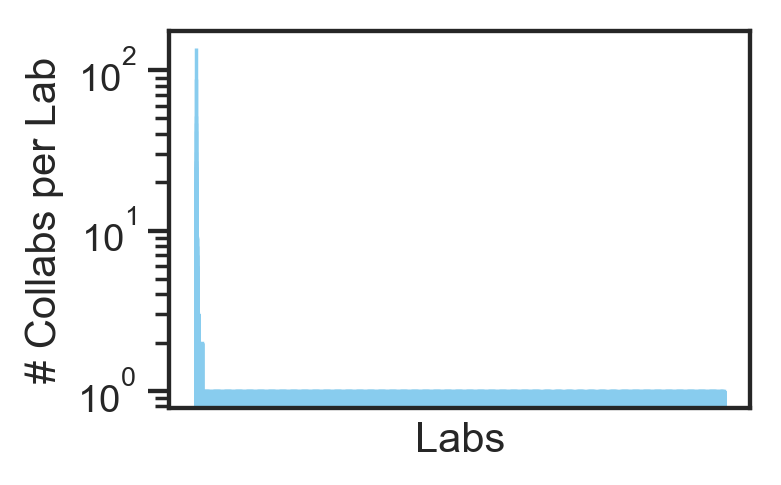

In [26]:
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Labs",
                    ylabel="# Collabs per Lab")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(lab_collab_counts)), height=lab_collab_counts, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])

!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/lab_collab_counts_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


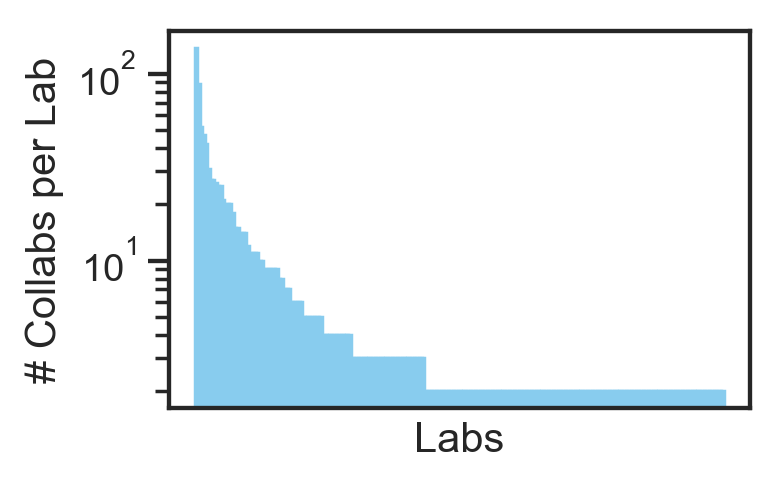

In [27]:
# Drop the singletons
mask = lab_collab_counts > 1
set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Labs",
                    ylabel="# Collabs per Lab")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=range(len(lab_collab_counts[mask])), height=lab_collab_counts[mask], color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
ax.set_xticks([])

!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/lab_collab_counts_NO_SINGLES_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


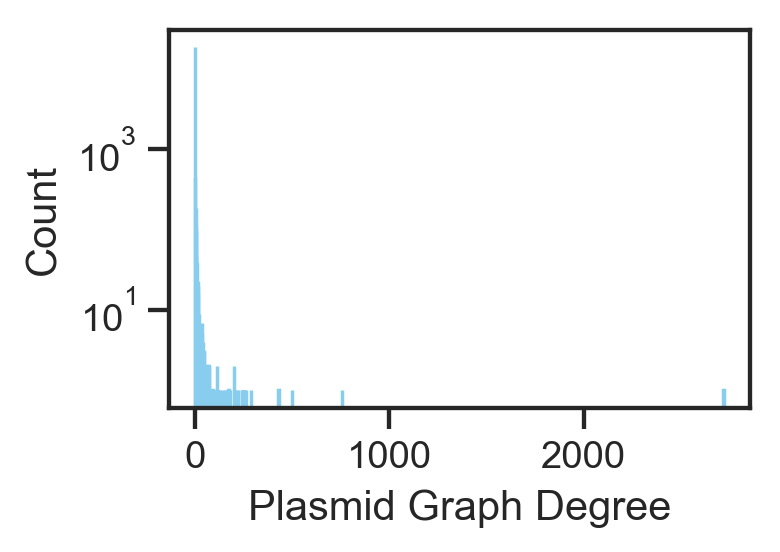

In [28]:
# Plasmid degree distribution
G = nx.from_pandas_edgelist(graph, "from", "to",create_using=nx.DiGraph)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Plasmid Graph Degree",
                    ylabel="Count")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=deg, height=cnt, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
#ax.set_xticks([])
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/plasmid_collab_graph_degree_dist_v0", dpi=500)

mkdir: cannot create directory ‘../../data/manuscript/figs/4/b_power_laws’: File exists


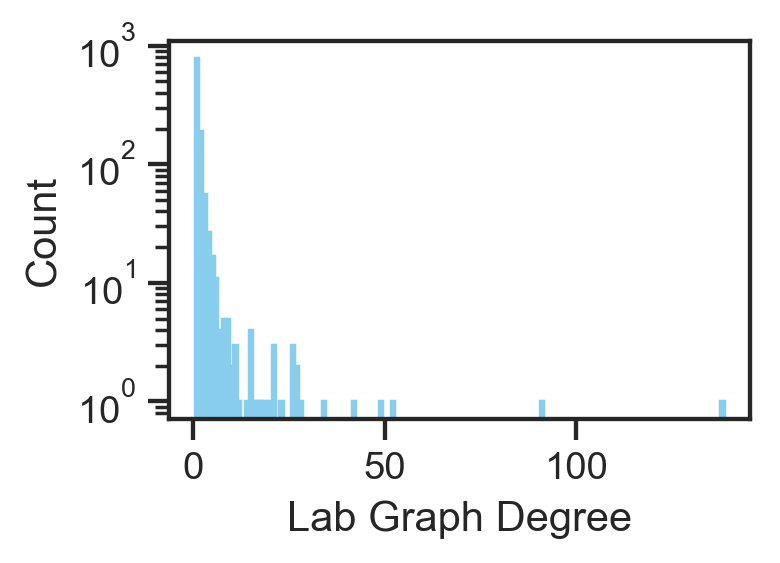

In [29]:
# Lab collab degree distribution
G = nx.from_pandas_edgelist(lab_graph, "from", "to",create_using=nx.DiGraph)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

set_pub_plot_context(context="notebook")
sns.set_style("ticks")
fig = plt.figure(figsize=(3,2), dpi=250)
ax = fig.add_subplot(111,
                    xlabel="Lab Graph Degree",
                    ylabel="Count")
palette = sns.color_palette()
#ax.scatter(x=range(len(lab_counts)), y=lab_counts, color=palette[0], s=4, linewidths=.1, edgecolors="black", alpha=.5)#, edgecolor="black", linewidth=.01)
ax.bar(left=deg, height=cnt, color=palette[0], edgecolor=palette[0])
ax.set_yscale("log", base=10)
!mkdir ../../data/manuscript/figs/4/b_power_laws
save_for_pub(fig, path="../../data/manuscript/figs/4/b_power_laws/lab_collab_graph_degree_dist_v0", dpi=500)

In [30]:
# Now pagerank
G = nx.from_pandas_edgelist(graph, "from", "to",create_using=nx.DiGraph)

pr_plasmids = nx.pagerank(G)

In [31]:
unique_plasmids = pd.DataFrame(pd.concat([graph['from'], graph['to']], axis=0).drop_duplicates(), columns=["plasmid"])
unique_plasmids

,plasmid
0,1280
1,1380
3,1490
4,1494
9,1495
10,1496
11,1497
13,1592
14,1632
15,1654


In [32]:
unique_plasmids['score'] = unique_plasmids['plasmid'].map(lambda x: pr_plasmids[x])
unique_plasmids

,plasmid,score
0,1280,0.000047
1,1380,0.000052
3,1490,0.000047
4,1494,0.000047
9,1495,0.000047
10,1496,0.000047
11,1497,0.000047
13,1592,0.000047
14,1632,0.000047
15,1654,0.000047


In [33]:
unique_plasmids = unique_plasmids.sort_values(by="score", ascending=False)
unique_plasmids

,plasmid,score
11136,104994,0.000211
11132,104990,0.000211
15727,101106,0.000198
7417,108175,0.000162
18187,101104,0.000162
10977,51430,0.000135
3,61021,0.000126
18599,110344,0.000126
18276,104991,0.000123
18282,104995,0.000123


In [34]:
full.loc[unique_plasmids.plasmid[:10], :]

,lab_id,plasmid,lab,category,sequence,lineage,ancestor_ids,alt_name,backbone_manufacturer,bacterial_resistance,...,growth_temp,growth_instructions,insert_size,modifications_to_backbone,mutation,selectable_markers,species,vector_backbone,vector_type,grna_shrna_sequence
addgene_id,,,,,,,,,,,,,,,,,,,,,
104994,368,lenti-SpCas9 puro,Brett Stringer,addgene-full,GTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTGCACTCTCAG...,923.0,"[52961, 104995, 104996, 104997, 98290]",None,Brett Stringer from Feng Zhang plasmid lentiCR...,Ampicillin,...,37,Single colonies of transformed STBL3 or STBL4 ...,24,The U6 promoter-2 kb BsmBI-BsmBI filler casset...,None,Puromycin,Synthetic,lentiCRISPRv2 puro (Addgene #98290),"Mammalian Expression, Lentiviral, CRISPR",None
104990,368,lenti-sgRNA puro,Brett Stringer,addgene-full,GTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTGCACTCTCAG...,923.0,"[104992, 52961, 104993, 98290, 104991]",None,Brett Stringer from Feng Zhang plasmid lentiCR...,Ampicillin,...,37,Single colonies of transformed STBL3 or STBL4 ...,None,The Cas9-P2A-puro cassette of lentiCRISPRv2 pu...,None,Puromycin,None,lentiCRISPRv2 puro (Addgene #98290),"Mammalian Expression, Lentiviral, CRISPR",None
101106,3452,pVEGFR2_TEV(N)_NES_TCS(Q'L)_FKBP_HA-dCas9(N)_P...,Tudor Fulga,addgene-full,CTAGAGGTACCCGTTACATAACTTACGGTAAATGGCCCGCCTGGCT...,330.0,"[62888, 101104]",None,None,Ampicillin,...,37,None,None,(FKBP) from pX856 vector (gift from Feng Zhang...,None,Puromycin,None,pVEGFR2_TEV(N)_NES_TCS(Q'L)_HA-dCas9(N)_P2A_Pu...,"Mammalian Expression, CRISPR, Synthetic Biology",None
108175,368,pF CAG BFP2 IRES neo,Brett Stringer,addgene-full,GACATTGATTATTGACTAGTTATTAATAGTAATCAATTACGGGGTC...,1064.0,"[34632, 98294]",BFP2,Brett Stringer,Ampicillin,...,30,Single colonies of transformed STBL3 or STBL4 ...,711,The firefly luciferase gene of pF CAG luc IRES...,None,Neomycin (select with G418),Synthetic,pF CAG luc IRES neo (Addgene plasmid # 98294),"Mammalian Expression, Lentiviral ; Fluorescent...",None
101104,3452,pVEGFR2_TEV(N)_NES_TCS(Q'L)_HA-dCas9(N)_P2A_Pu...,Tudor Fulga,depositor-full,CTAGAGGTACCCGTTACATAACTTACGGTAAATGGCCCGCCTGGCT...,330.0,"[101101, 23925]",None,None,Ampicillin,...,37,None,None,domain and transmembrane domain were PCR ampli...,None,Puromycin,None,pTMt_NES_TCS(Q’G)_HA-dCas9(N)_P2A-Puro-WPRE,"Mammalian Expression, CRISPR, Synthetic Biology",None
51430,3602,pAF1-VP64-SeqFosA,Xavier Darzacq,depositor-full,GACGGATCGGGAGATCTCCCGATCCCCTATGGTGCACTCTCAGTAC...,486.0,[51427],None,None,Ampicillin,...,37,None,1172,pAF1-VP64-SeqFosA was obtained by introduction...,None,Neomycin (select with G418),Synthetic,pAF1-VP64,Mammalian Expression,None
61021,430,pHT101-mCherry,Casonya Johnson,depositor-full,AAGCTTGCATGCCTGCAGGTCGACTCTAGAGGATCCCCGGGATTGG...,684.0,"[1490, 19327]",None,Andrew Fire (Addgene plasmid #1490),Ampicillin,...,37,None,None,mCherry was amplified from pCFJ90 (Addgene pla...,None,None,None,pPD95_67,Worm Expression,None
110344,3014,pQC MCS IRES G418,Sandra Martha Gomes Dias,addgene-full,TGACATTGATTATTGACTAGTTATTAATAGTAATCAATTACGGGGT...,13.0,"[110343, 31183]",None,#110343,Ampicillin,...,37,None,None,Region between BglII and EcoRI from original b...,None,Neomycin (select with G418),None,pQC MCS IRES Puro,"Mammalian Expression, Retroviral",None
104991,368,lenti-sgRNA hygro,Brett Stringer,addgene-full,GTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTGCACTCTCAG...,923.0,"[104992, 52961, 104993, 98291]",None,Brett Stringer from Feng Zhang plasmid lentiCR...,Ampicillin,...,37,Single colonies of transformed STBL3 or STBL4 ...,None,The Cas9-P2A-hygro cassette of lentiCRISPRv2 h...,None,Hygromycin,None,lentiCRISPRv2 hygro (Addgene #98291),"Mammalian Expression, Lentiviral, CRISPR",None


In [35]:
G = nx.from_pandas_edgelist(lab_graph, "from", "to",create_using=nx.DiGraph)

pr_labs = nx.pagerank(G)

In [36]:
pr_labs

{'Andrew Fire': 0.0013651742070697223,
 'Casonya Johnson': 0.000886611258756915,
 'David Ron': 0.0010121194747142316,
 'Don Moerman': 0.0007868623709655104,
 'Hitoshi Sawa': 0.0007868623709655104,
 'David Tirrell': 0.0008090287904747115,
 'Judith Kimble': 0.0007868623709655104,
 'Meng-Qiu Dong': 0.0007868623709655104,
 'Patricia Kuwabara': 0.0007868623709655104,
 'Guy Caldwell': 0.0007868623709655104,
 'Michael Ristow': 0.0007868623709655104,
 'Jane Hubbard': 0.0013890436999982815,
 'Heidi Tissenbaum': 0.0007868623709655104,
 'Lisa Timmons': 0.0007868623709655104,
 'Sean Ryder': 0.0007868623709655104,
 'Garry Nolan': 0.0007039633783653944,
 'Eric Fearon': 0.0009034611539482035,
 'Martin Kluger': 0.0009034611539482035,
 'Andrew Rice': 0.0009034611539482035,
 'Hartmut Land': 0.0007039633783653944,
 'Bob Weinberg': 0.002520662473646819,
 'Robert Kingston': 0.0007384918395239575,
 'Ben Neel': 0.0007154728654182488,
 'Andrew Lassar': 0.0007154728654182488,
 'Joan Ruderman': 0.00071547286541

In [37]:
unique_labs = pd.DataFrame(pd.concat([lab_graph['from'], lab_graph['to']], axis=0).drop_duplicates(), columns=["lab"])
unique_labs

,lab
3,Andrew Fire
39,Garry Nolan
46,Hartmut Land
290,Jeffrey Green
294,Bob Weinberg
386,Kurt Thorn
389,David Waugh
391,Joel Huberman
406,Yang Shi
412,William Hahn


In [38]:
unique_labs['score'] = unique_labs['lab'].map(lambda x: pr_labs[x])
unique_labs

,lab,score
3,Andrew Fire,0.001365
39,Garry Nolan,0.000704
46,Hartmut Land,0.000704
290,Jeffrey Green,0.000704
294,Bob Weinberg,0.002521
386,Kurt Thorn,0.000704
389,David Waugh,0.000704
391,Joel Huberman,0.000704
406,Yang Shi,0.000704
412,William Hahn,0.001371


In [39]:
unique_labs.sort_values(by="score", ascending=False)

,lab,score
577,Connie Cepko,0.004344
3499,Tudor Fulga,0.003172
1576,Daniel Durocher,0.002921
14284,Michael Davidson,0.002609
1576,Randall Moon,0.002578
294,Bob Weinberg,0.002521
207,Sandra Martha Gomes Dias,0.002326
17252,Steve Shih,0.002303
4059,Cheryl Arrowsmith,0.002230
9624,Chris Jeans,0.002188


In [40]:
# Now will do the above but for countries, and with weighted edges
country_info = pickle.load(open("../../data/full/lab_info_processed_for_prediction.pkl", "rb"))
country_info

,lab,location,affiliation
lab_id,,,
0,A. Radu Aricescu,United Kingdom,"Division of Structural Biology, Wellcome Centr..."
1,Aaron Gitler,United States,"Department of Cell and Developmental Biology, ..."
3,Aaron Hoskins,United States,"Department of Biochemistry, University of Wisc..."
4,Aaron Meyer,United States,Koch Institute for Integrative Cancer Research...
5,Abby Dernburg,United States,"Department of Molecular and Cell Biology, Univ..."
6,Adam Antebi,Germany,"Max Planck Institute for Biology of Ageing, Jo..."
7,Adam Arkin,United States,"Department of Bioengineering, University of Ca..."
8,Adam Bogdanove,United States,"Department of Genetics, Cell Biology & Develop..."
10,Adam Cohen,United States,"Department of Chemistry and Chemical Biology, ..."


In [41]:
country_info = country_info.set_index("lab")
country_info

,location,affiliation
lab,,
A. Radu Aricescu,United Kingdom,"Division of Structural Biology, Wellcome Centr..."
Aaron Gitler,United States,"Department of Cell and Developmental Biology, ..."
Aaron Hoskins,United States,"Department of Biochemistry, University of Wisc..."
Aaron Meyer,United States,Koch Institute for Integrative Cancer Research...
Abby Dernburg,United States,"Department of Molecular and Cell Biology, Univ..."
Adam Antebi,Germany,"Max Planck Institute for Biology of Ageing, Jo..."
Adam Arkin,United States,"Department of Bioengineering, University of Ca..."
Adam Bogdanove,United States,"Department of Genetics, Cell Biology & Develop..."
Adam Cohen,United States,"Department of Chemistry and Chemical Biology, ..."


In [42]:
country_graph_to = lab_graph['to'].map(lambda x: country_info.loc[x,'location'] if x in country_info.index.values else np.nan)
country_graph_from = lab_graph['from'].map(lambda x: country_info.loc[x,'location'] if x in country_info.index.values else np.nan)
country_graph = pd.DataFrame({
    'from':country_graph_from,
    'to': country_graph_to
})
country_graph

,from,to
3,United States,NaN
4,United States,United Kingdom
6,United States,Canada
7,United States,Japan
8,United States,United States
11,United States,United States
12,United States,China
14,United States,United Kingdom
15,United States,NaN
20,United States,Germany


In [43]:
# Drop these nans
country_graph = country_graph.dropna()
country_graph

,from,to
4,United States,United Kingdom
6,United States,Canada
7,United States,Japan
8,United States,United States
11,United States,United States
12,United States,China
14,United States,United Kingdom
20,United States,Germany
23,United States,United States
26,United States,United States


In [44]:
counted_collabs = collections.Counter()
for i in country_graph.index.values:
    counted_collabs.update(
       [(country_graph['from'][i], country_graph['to'][i])]
    )

In [45]:
pair, counts = zip(*counted_collabs.most_common())
pair

(('United States', 'United States'),
 ('Germany', 'United States'),
 ('United Kingdom', 'United States'),
 ('United States', 'United Kingdom'),
 ('United States', 'Canada'),
 ('Switzerland', 'United States'),
 ('United States', 'Japan'),
 ('United States', 'France'),
 ('United States', 'Switzerland'),
 ('United States', 'Australia'),
 ('United States', 'Germany'),
 ('United Kingdom', 'United Kingdom'),
 ('United States', 'Netherlands'),
 ('Netherlands', 'United States'),
 ('United States', 'Spain'),
 ('United States', 'China'),
 ('United States', 'Italy'),
 ('Germany', 'Germany'),
 ('United States', 'Singapore'),
 ('Australia', 'United States'),
 ('United Kingdom', 'Canada'),
 ('Netherlands', 'Germany'),
 ('Germany', 'United Kingdom'),
 ('United States', 'Denmark'),
 ('United States', 'Republic of Korea'),
 ('Switzerland', 'Switzerland'),
 ('Switzerland', 'Germany'),
 ('United States', 'Israel'),
 ('Germany', 'Canada'),
 ('Canada', 'United States'),
 ('China', 'China'),
 ('France', 'Un

In [46]:
country_from, country_to = zip(*pair)
country_graph = pd.DataFrame({
    "from": country_from,
    "to": country_to,
    "counts": counts
})
country_graph

,from,to,counts
0,United States,United States,519
1,Germany,United States,103
2,United Kingdom,United States,57
3,United States,United Kingdom,49
4,United States,Canada,25
5,Switzerland,United States,21
6,United States,Japan,18
7,United States,France,17
8,United States,Switzerland,17
9,United States,Australia,15


In [47]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
G = nx.from_pandas_edgelist(country_graph, "from", "to",edge_attr="counts",create_using=nx.DiGraph)
G.edges(data=True)

OutEdgeDataView([('United States', 'United States', {'counts': 519}), ('United States', 'United Kingdom', {'counts': 49}), ('United States', 'Canada', {'counts': 25}), ('United States', 'Japan', {'counts': 18}), ('United States', 'France', {'counts': 17}), ('United States', 'Switzerland', {'counts': 17}), ('United States', 'Australia', {'counts': 15}), ('United States', 'Germany', {'counts': 14}), ('United States', 'Netherlands', {'counts': 11}), ('United States', 'Spain', {'counts': 10}), ('United States', 'China', {'counts': 8}), ('United States', 'Italy', {'counts': 8}), ('United States', 'Singapore', {'counts': 8}), ('United States', 'Denmark', {'counts': 5}), ('United States', 'Republic of Korea', {'counts': 5}), ('United States', 'Israel', {'counts': 4}), ('United States', 'Belgium', {'counts': 3}), ('United States', 'Hungary', {'counts': 3}), ('United States', 'Austria', {'counts': 3}), ('United States', 'Finland', {'counts': 2}), ('United States', 'Greece', {'counts': 2}), ('Un

In [48]:
edge_weights = [d['counts'] for fr, to, d in G.edges(data=True)]
edge_weights[:10]

[519, 49, 25, 18, 17, 17, 15, 14, 11, 10]

mkdir: cannot create directory ‘../../data/manuscript/figs/4/d_country_collab’: File exists


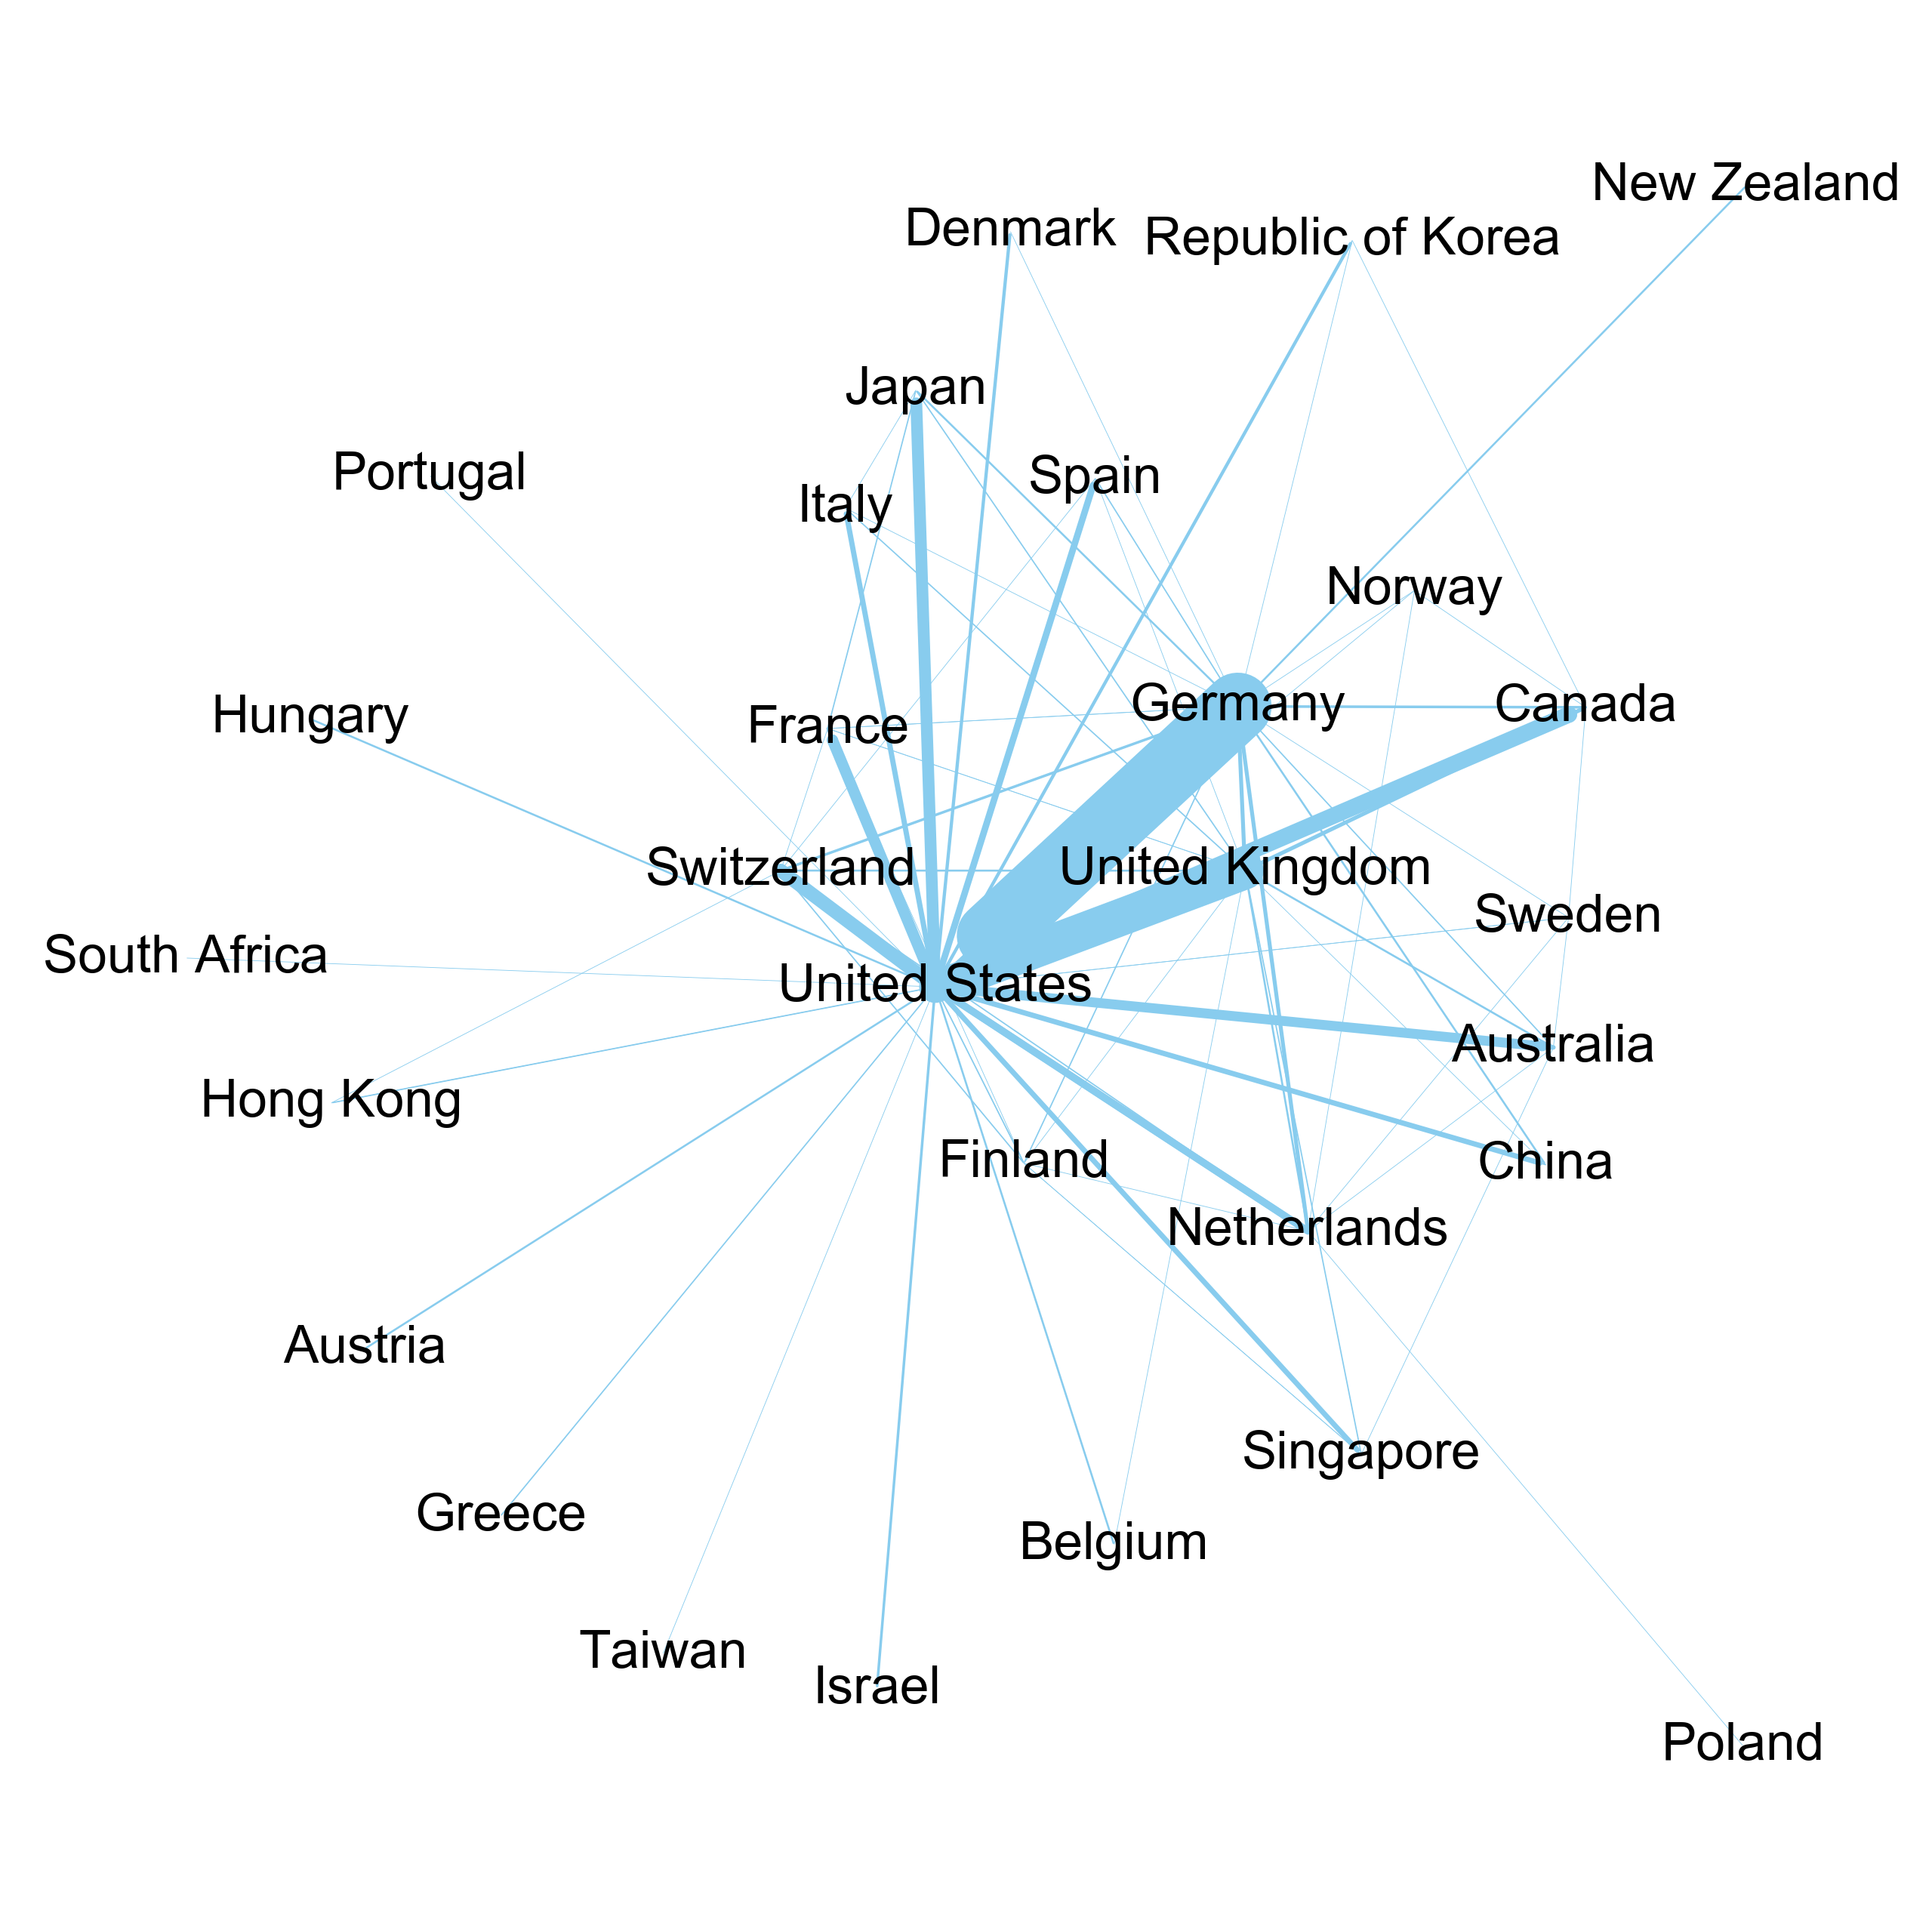

In [49]:

#pos = nx.draw(G, withlabels=False, width=1, node_size=1, pos=nx.kamada_kawai_layout(G));
#pos = nx.spring_layout(G)#
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='fdp')
fig = plt.figure(figsize=(10,10), dpi=250)
nx.draw(G, pos,with_labels=True, width=np.array(edge_weights)/4, node_size=0, arrowsize=0.0001, alpha=1, 
        edge_color=palette[0], node_shape="o", font_size=20)#arrowstyle='fancy') #linewidths=4)

!mkdir ../../data/manuscript/figs/4/d_country_collab
save_for_pub(fig, path="../../data/manuscript/figs/4/d_country_collab/self_loops_v0", dpi=500)

# Quick country (weighted) pagerank

In [50]:
# First need to build a weighted graph with the counts
WG = nx.DiGraph()
WG.add_weighted_edges_from(
    [(row['from'], row['to'], row['counts']) for i,row in country_graph.iterrows()]
)
WG.edges(data=True)

OutEdgeDataView([('United States', 'United States', {'weight': 519}), ('United States', 'United Kingdom', {'weight': 49}), ('United States', 'Canada', {'weight': 25}), ('United States', 'Japan', {'weight': 18}), ('United States', 'France', {'weight': 17}), ('United States', 'Switzerland', {'weight': 17}), ('United States', 'Australia', {'weight': 15}), ('United States', 'Germany', {'weight': 14}), ('United States', 'Netherlands', {'weight': 11}), ('United States', 'Spain', {'weight': 10}), ('United States', 'China', {'weight': 8}), ('United States', 'Italy', {'weight': 8}), ('United States', 'Singapore', {'weight': 8}), ('United States', 'Denmark', {'weight': 5}), ('United States', 'Republic of Korea', {'weight': 5}), ('United States', 'Israel', {'weight': 4}), ('United States', 'Belgium', {'weight': 3}), ('United States', 'Hungary', {'weight': 3}), ('United States', 'Austria', {'weight': 3}), ('United States', 'Finland', {'weight': 2}), ('United States', 'Greece', {'weight': 2}), ('Un

In [51]:
pr_countries = nx.pagerank(WG)
unique_countries = pd.DataFrame(pd.concat([country_graph['from'], country_graph['to']], axis=0).drop_duplicates(), columns=["country"])
unique_countries

,country
0,United States
1,Germany
2,United Kingdom
5,Switzerland
13,Netherlands
19,Australia
29,Canada
30,China
31,France
41,Japan


In [52]:
unique_countries['score'] = unique_countries['country'].map(lambda x: pr_countries[x])
unique_countries

,country,score
0,United States,0.361565
1,Germany,0.022444
2,United Kingdom,0.041606
5,Switzerland,0.019771
13,Netherlands,0.013878
19,Australia,0.018656
29,Canada,0.041738
30,China,0.028530
31,France,0.024796
41,Japan,0.060939


In [53]:
unique_countries.sort_values(by="score", ascending=False)

,country,score
0,United States,0.361565
100,Denmark,0.069961
102,Austria,0.063659
41,Japan,0.060939
29,Canada,0.041738
2,United Kingdom,0.041606
75,Finland,0.030238
30,China,0.028530
16,Italy,0.025427
31,France,0.024796


In [54]:
# Try removing the self loops

for i in country_graph.index.values:
    if country_graph.loc[i,"from"] == country_graph.loc[i,'to']:
        country_graph.loc[i,"from"] = np.nan
        country_graph.loc[i,'to'] = np.nan
        
country_graph = country_graph.dropna()
country_graph

,from,to,counts
1,Germany,United States,103
2,United Kingdom,United States,57
3,United States,United Kingdom,49
4,United States,Canada,25
5,Switzerland,United States,21
6,United States,Japan,18
7,United States,France,17
8,United States,Switzerland,17
9,United States,Australia,15
10,United States,Germany,14


In [55]:
set_pub_plot_context(context="paper")
palette = sns.color_palette().as_hex()
G = nx.from_pandas_edgelist(country_graph, "from", "to",edge_attr="counts",create_using=nx.DiGraph)
G.edges(data=True)

OutEdgeDataView([('Germany', 'United States', {'counts': 103}), ('Germany', 'United Kingdom', {'counts': 6}), ('Germany', 'Canada', {'counts': 4}), ('Germany', 'New Zealand', {'counts': 3}), ('Germany', 'Japan', {'counts': 3}), ('Germany', 'China', {'counts': 3}), ('Germany', 'Finland', {'counts': 2}), ('Germany', 'Switzerland', {'counts': 2}), ('Germany', 'Australia', {'counts': 2}), ('Germany', 'Spain', {'counts': 2}), ('Germany', 'Netherlands', {'counts': 2}), ('Germany', 'Italy', {'counts': 1}), ('Germany', 'Denmark', {'counts': 1}), ('Germany', 'France', {'counts': 1}), ('Germany', 'Republic of Korea', {'counts': 1}), ('Germany', 'Sweden', {'counts': 1}), ('Germany', 'Norway', {'counts': 1}), ('United States', 'United Kingdom', {'counts': 49}), ('United States', 'Canada', {'counts': 25}), ('United States', 'Japan', {'counts': 18}), ('United States', 'France', {'counts': 17}), ('United States', 'Switzerland', {'counts': 17}), ('United States', 'Australia', {'counts': 15}), ('United

In [56]:
edge_weights = [d['counts'] for fr, to, d in G.edges(data=True)]
edge_weights[:10]

[103, 6, 4, 3, 3, 3, 2, 2, 2, 2]

mkdir: cannot create directory ‘../../data/manuscript/figs/4/d_country_collab’: File exists


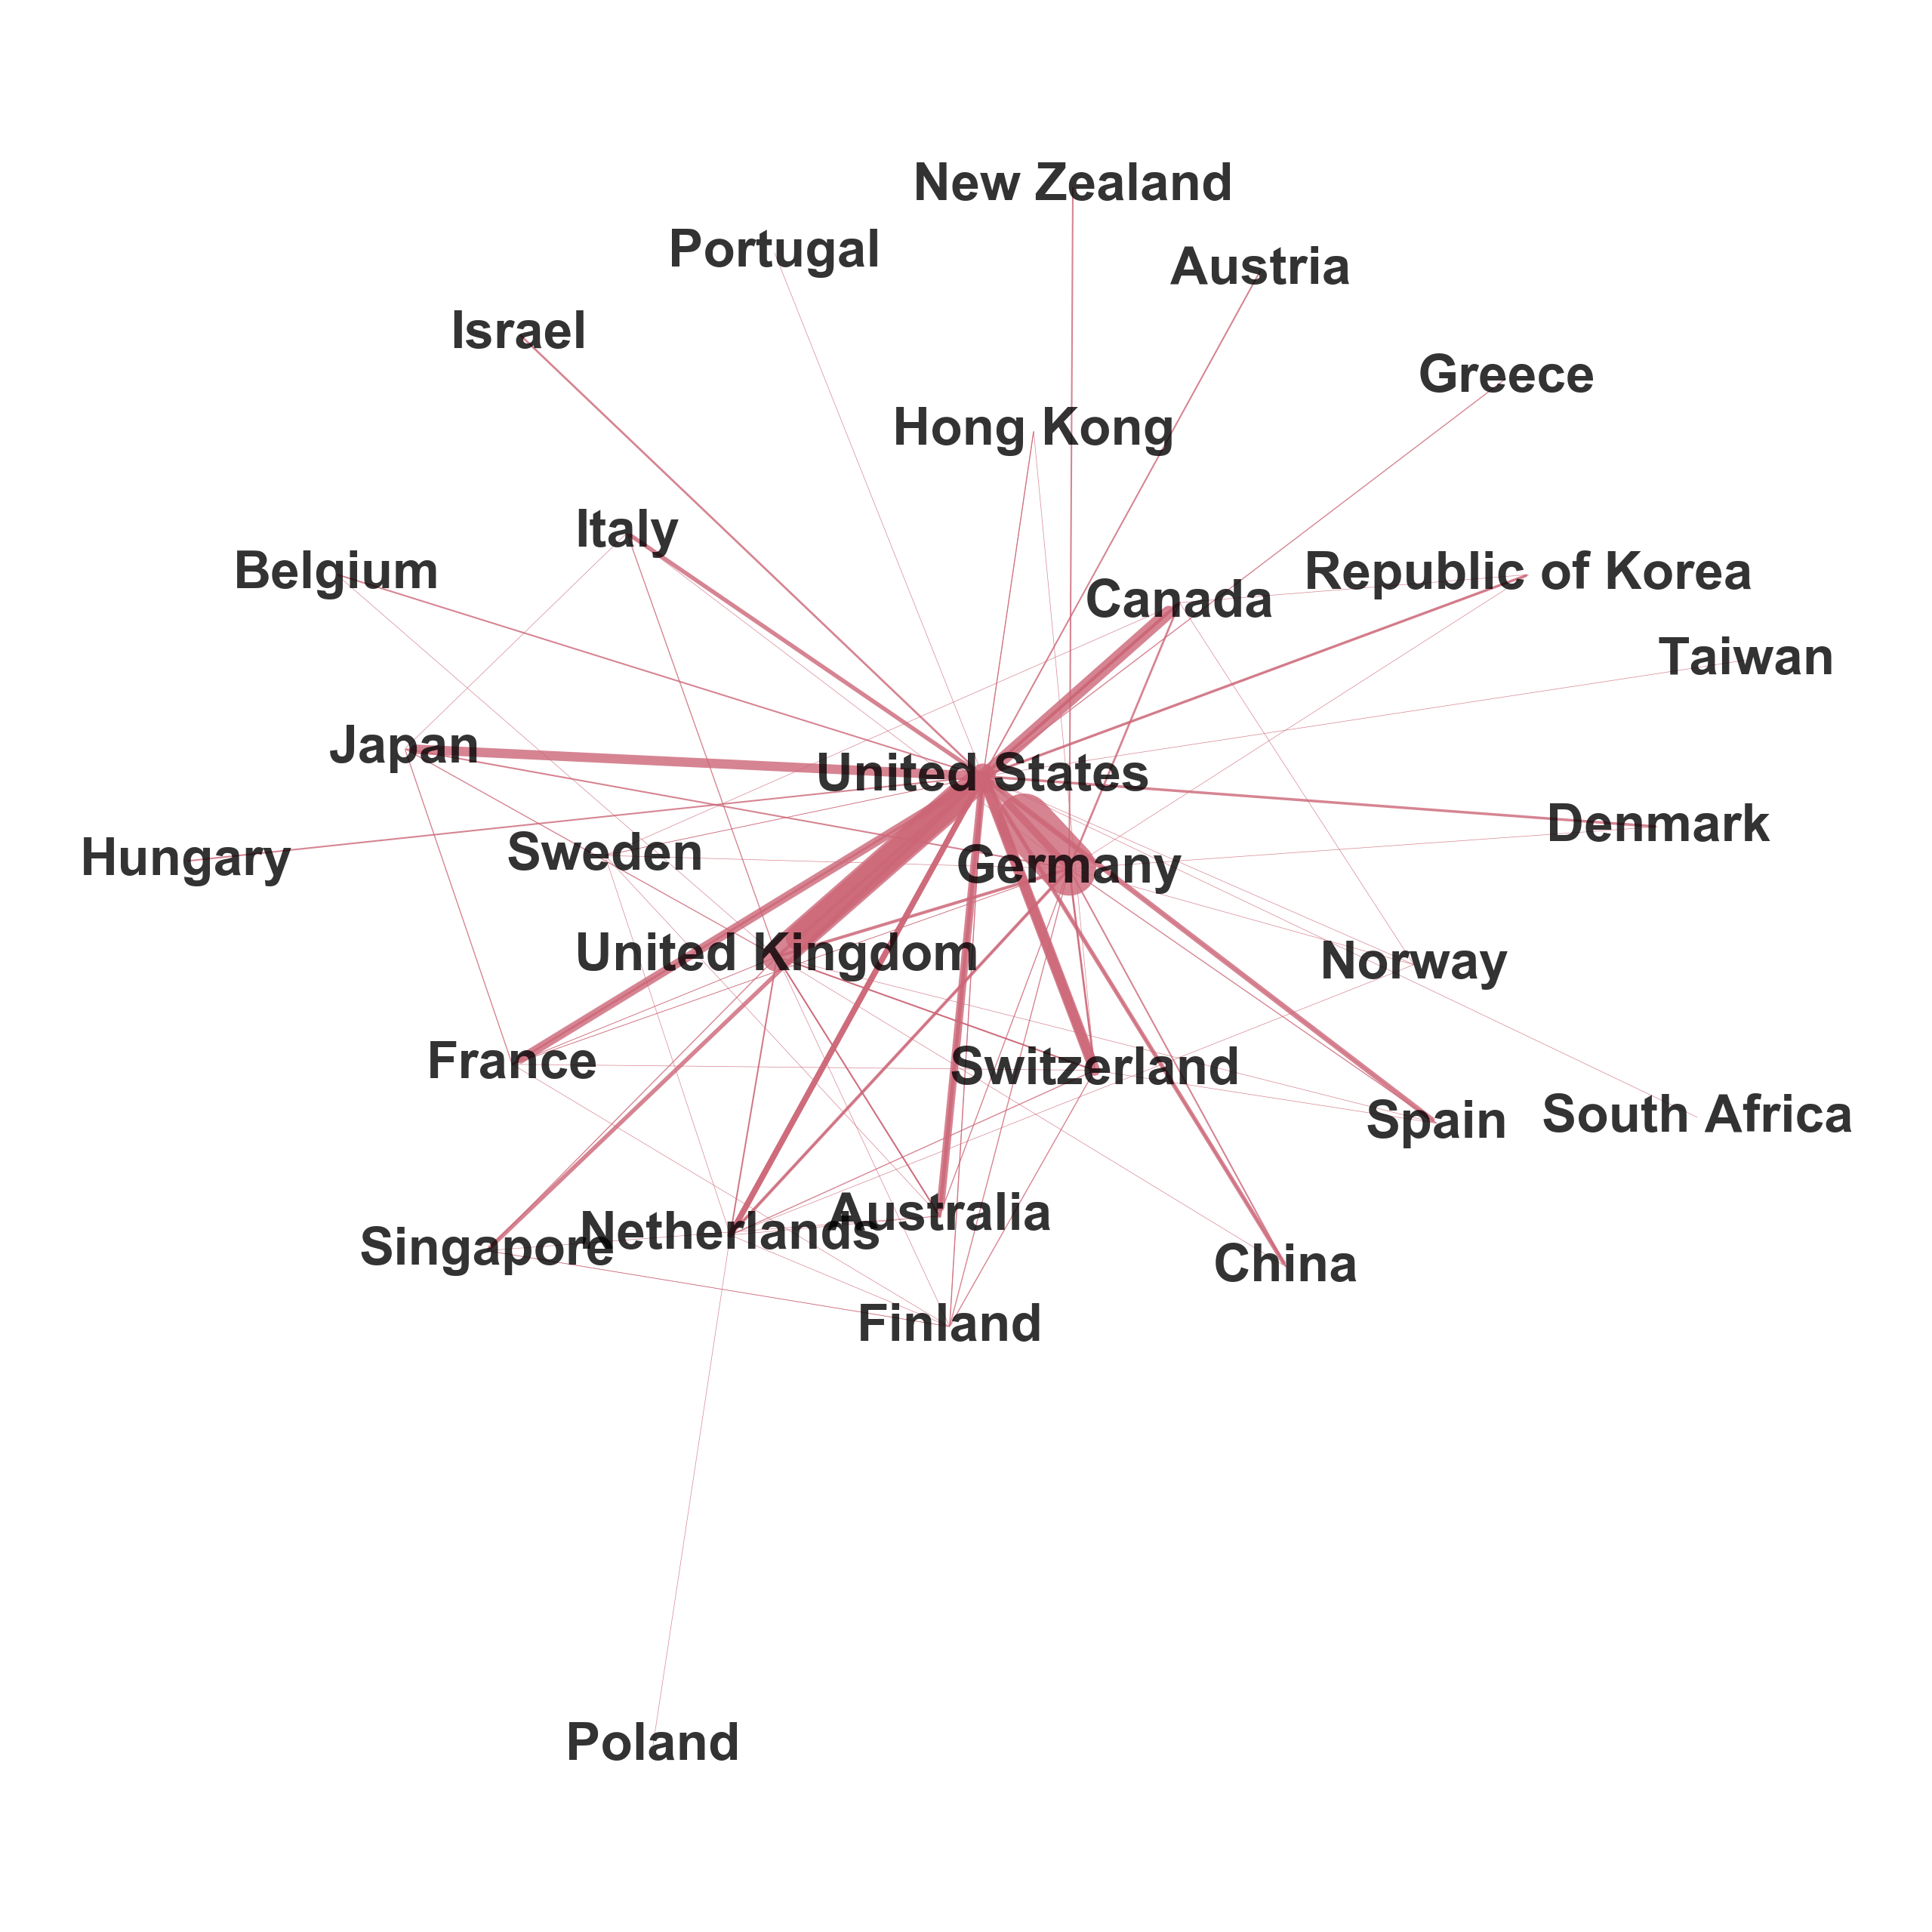

In [57]:
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')
fig = plt.figure(figsize=(10,10), dpi=250)
nx.draw(G, pos,with_labels=True, width=np.array(edge_weights)/5, node_size=0, arrowsize=.0001, alpha=.8, 
        edge_color=palette[1], node_shape="o", font_size=20, font_weight="bold")#arrowstyle='fancy') #linewidths=4)

!mkdir ../../data/manuscript/figs/4/d_country_collab
save_for_pub(fig, path="../../data/manuscript/figs/4/d_country_collab/v1", dpi=500)